In what follows we will demonstrate some of the basic network capabilities of the networkx package, but first we need some network data to play with. I sugest obtaining you linkedin contact network - it is straightforward to download your linkedin contacts, but the connections between them are unknown. For the purposes of illustation we will employ a few simple heuristics to obtain a more natural looking network. Instructions for obtaining the network from linkedin are on the blog post https://towardsdatascience.com/visualizing-my-linkedin-network-c4b232ab2ad0 and breifly summarised in the course notes.

In [1]:
#credit for what follows: https://towardsdatascience.com/visualizing-my-linkedin-network-c4b232ab2ad0
import pandas as pd
df = pd.read_csv('../data/Connections.csv')
df.head()

,First Name,Last Name,Email Address,Company,Position,Connected On
0,Rasit,Abay,NaN,UNSW Canberra,PhD Candidate (Astrodynamics & Machine Learning),07 Mar 2020
1,Ximena,Aguirre,NaN,Milenio Diario,Gerente Corporativo Sr Sustentabilidad,28 Feb 2020
2,Tyler,Bikaun,NaN,Wood,Graduate Mechanical Engineer,28 Feb 2020
3,Malka N.,Halgamuge,malka.nisha@unimelb.edu.au,Department of Electrical and Electronic Engine...,Research Scientist,24 Feb 2020
4,Sanal,Panicker,NaN,Community News,Database Manager,23 Feb 2020


Now, we should tidy up the linkedin data a little. Most likely, you'll have some anonymous/nameless individuals in your contact list (atleast I do). Seek them out and assign them generic but unique names.

In [2]:
#replace the NaNs with strings
i=1
for ind in df.index:
    if isinstance(df['First Name'][ind] ,str) & isinstance(df['Last Name'][ind] ,str) :
        #do nothing
        pass #empty if statements confuse python
    else :
        df['First Name'][ind]='FirstName'+str(i)
        df['Last Name'][ind]='LastName'+str(i)
        i+=1

Now we are ready to construct a network. Admittedly, this construction is a little artificial for linkedin data. But, this serves as a good demonstration of using network representations to seek out coincidence, and structure in unstructured data. Do contacts cluster? In what follows, we map each individual to a node and connect nodes if the individuals: (a) are from the same company, or (b) connected over linkedin within a short time window of each other. For your own data set, you may want to adjust the window.

In [13]:
#!pip install networkx
import networkx as nx
import matplotlib.pyplot as plt
from datetime import timedelta, datetime


G=nx.Graph()
for nodei in df.index:    
    nodeilabel= df['First Name'][nodei]+" "+df['Last Name'][nodei]
    nodeitime=df['Connected On'][nodei]
    nodeicomp=df['Company'][nodei]
    for nodej in df.index:
        if nodei!=nodej:
            if nodeicomp==df['Company'][nodej]: #are the nodes from the same company?
                G.add_edge(nodeilabel,df['First Name'][nodej]+" "+df['Last Name'][nodej])
            date1=datetime.strptime(nodeitime, '%d %b %Y').date()
            date2=datetime.strptime(df['Connected On'][nodej], '%d %b %Y').date()
            if (abs(date2-date1)<timedelta(days=0)): #are the nodes from the same time?
                G.add_edge(nodeilabel,df['First Name'][nodej]+" "+df['Last Name'][nodej])

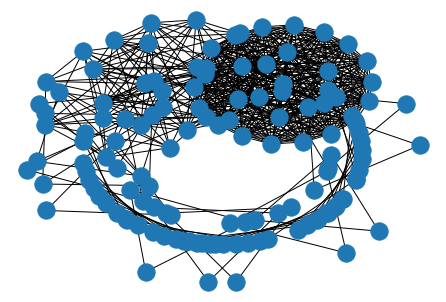

In [14]:
nx.draw_kamada_kawai(G)

We don't have time to go through all this here, but in what follows we can run through the computation of some of the network quantities discussed before. Are the high ranked individuals important? Are they clustered? Do the clusters correspond to meaningful organisation/groups/themes? (For my linkedin network they do).

In [5]:
#Credit: the following code is from https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python#centrality
from operator import itemgetter

degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('John Dell', 30)
('Dilusha Silva', 27)
('Sue Robson', 26)
('Simon Biggs', 26)
('Edgar Basto Piamonte', 26)
('Annabel Williamson GAICD', 25)
('Mark Reynolds', 25)
('Benjamin Stone', 25)
('Sean Hood', 25)
('David Walker', 25)
('Joanna Elfving-Hwang', 24)
('Kathrin Stroud', 24)
('Anas Ghadouani', 24)
('Eun-Jung Holden', 24)
('Michael Bertolacci', 24)
('Peter Dean', 24)
('Rob Shannon', 24)
('Claire Walker', 24)
('Cristina Vulpe', 24)
('Mitchell Chiew', 24)


In [6]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [7]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('John Dell', 0.0059481443823080835)
('Grant Douglas', 0.0038637519064565326)
('Dilusha Silva', 0.003202846975088968)
('Sue Robson', 0.0021860701576004067)
('Simon Biggs', 0.0021860701576004067)
('Benjamin Stone', 0.0021860701576004067)
('Edgar Basto Piamonte', 0.0021860701576004067)
('nariman mahdavi', 0.0012709710218607015)
('Annabel Williamson GAICD', 0.0011184544992374173)
('Mark Reynolds', 0.0011184544992374173)
('Sean Hood', 0.0011184544992374173)
('David Walker', 0.0011184544992374173)
('Zhang Xin', 0.0011184544992374173)
('Gaurav Singh', 0.0010167768174885613)
('Hayley Mcgillivray', 0.0008769700050838841)
('Jelena Markov', 0.0008769700050838841)
('Phil Newman', 0.000762582613116421)
('Brendan Florio', 0.0006609049313675648)
('Jens Klump', 0.0006609049313675648)
('Michael McWilliams', 0.0006609049313675648)


In [8]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: John Dell | Betweenness Centrality: 0.0059481443823080835 | Degree: 30
Name: Grant Douglas | Betweenness Centrality: 0.0038637519064565326 | Degree: 19
Name: Dilusha Silva | Betweenness Centrality: 0.003202846975088968 | Degree: 27
Name: Sue Robson | Betweenness Centrality: 0.0021860701576004067 | Degree: 26
Name: Simon Biggs | Betweenness Centrality: 0.0021860701576004067 | Degree: 26
Name: Benjamin Stone | Betweenness Centrality: 0.0021860701576004067 | Degree: 25
Name: Edgar Basto Piamonte | Betweenness Centrality: 0.0021860701576004067 | Degree: 26
Name: nariman mahdavi | Betweenness Centrality: 0.0012709710218607015 | Degree: 14
Name: Annabel Williamson GAICD | Betweenness Centrality: 0.0011184544992374173 | Degree: 25
Name: Mark Reynolds | Betweenness Centrality: 0.0011184544992374173 | Degree: 25
Name: Sean Hood | Betweenness Centrality: 0.0011184544992374173 | Degree: 25
Name: David Walker | Betweenness Centrality: 0.0011184544992374173 | Degree: 25
Name: Zhang Xin | Betw

In [9]:
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.
communities = community.greedy_modularity_communities(G)

In [10]:
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G, modularity_dict, 'modularity')

In [11]:
# First get a list of just the nodes in that class
class0 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 0]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class0}

# Then sort that dictionary and print the first 5 results
class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by Eigenvector Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])

Modularity Class 0 Sorted by Eigenvector Centrality:
Name: Dilusha Silva | Eigenvector Centrality: 0.2006224862442516
Name: Sue Robson | Eigenvector Centrality: 0.200225924746069
Name: Simon Biggs | Eigenvector Centrality: 0.200225924746069
Name: Edgar Basto Piamonte | Eigenvector Centrality: 0.200225924746069
Name: Benjamin Stone | Eigenvector Centrality: 0.19986431094964086


In [12]:
for i,c in enumerate(communities): # Loop through the list of communities
    if len(c) > 2: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(i)+':', list(c)) # Print out the classes and their members

Class 0: ['思源 吉', 'Xiumin Li', 'Edgar Basto Piamonte', 'Kathrin Stroud', 'Mark Reynolds', 'Jill Stajduhar GAICD', 'YANG BAI', 'Kevin Xiao', 'Anne Geiger De Feo', 'Mythreye Krishnan', 'Lucas Lacasa', 'Rob Shannon', 'Michael Bertolacci', 'Cheryl Praeger', 'David Walker', 'Joshua B. van Kampen MBA', '炎 Tomas 黃', 'Xi Shen', 'Simon Biggs', 'Peter Dean', 'Anas Ghadouani', 'Annabel Williamson GAICD', 'Mitchell Chiew', 'Muhammad Hamza', 'Eun-Jung Holden', 'Joanna Elfving-Hwang', 'Sivarit Sultornsanee, Ph.D.', 'Melinda Hodkiewicz', 'Tim Craske', 'Sue Robson', 'Benjamin Stone', 'Sean Hood', 'Mark Holton', 'Claire Walker', '静 石', 'JP Barnard', 'Zhang Xin', 'Dilusha Silva', 'Cristina Vulpe']
Class 1: ['Ulrich Engelke', 'Jens Klump', 'nariman mahdavi', 'Angus McFarlane', 'Dr Robert Hough (GAICD)', 'Xinghuo Yu', 'Caroline Johnson', 'Grant Douglas', 'Margaux Le Vaillant', 'Jelena Markov', 'Hugo Le Breton', 'Hayley Mcgillivray', 'Neil Francis', 'Mukhdeep Singh Manshahia (Dr.)', 'Ingo Fischer', 'Brenda